In [1]:
import scvi 
from anndata import AnnData as ad
import scanpy as sc
import os

IOStream.flush timed out


In [2]:
from celldreamer.paths import DATA_DIR

In [3]:
dataset_path = os.path.join(DATA_DIR, 'raw', 'lung_atlas.h5ad')

adata_path = os.path.join(dataset_path)

Load lung data with scanpy 

In [4]:
adata = sc.read(
    adata_path,
    backup_url="https://figshare.com/ndownloader/files/24539942",
)

  0%|          | 0.00/972M [00:00<?, ?B/s]

Preprocess

In [5]:
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True)

In [6]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 32472 × 2000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

Visualize

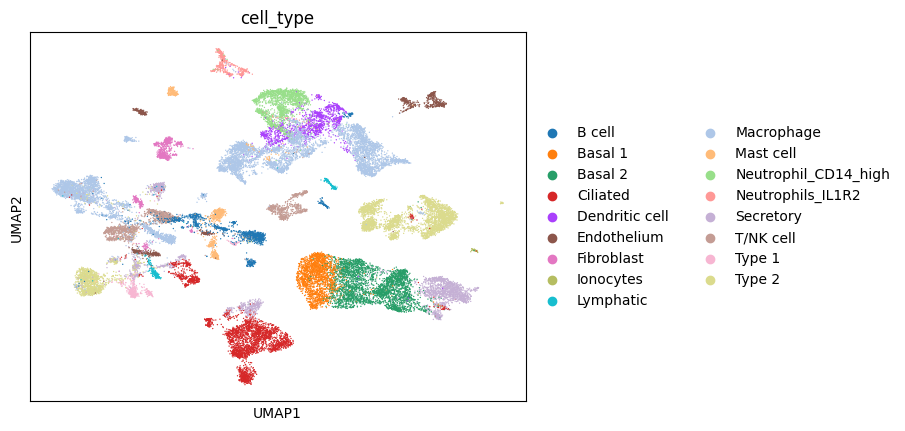

In [8]:
sc.pl.umap(adata, color="cell_type")

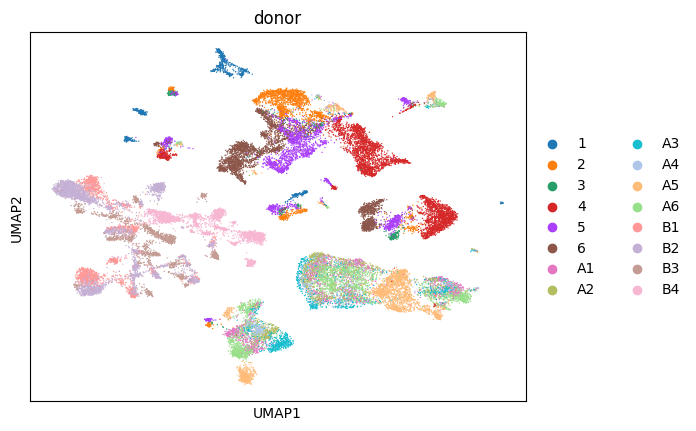

In [9]:
sc.pl.umap(adata, color="donor")

Save counts as `X_counts`

In [10]:
adata.layers["X_counts"] = adata.layers["counts"].copy()

In [11]:
del adata.layers["counts"]

In [12]:
processed_dataset_path = os.path.join(DATA_DIR, 'processed', 'lung_atlas.h5ad')

ad.write_h5ad(adata, processed_dataset_path)